In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df = df.dropna()
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
df.duplicated().sum()
df[df.duplicated()]

,TV,Radio,Newspaper,Sales


In [7]:
duplicate = df.groupby(['TV', 'Sales']).filter(lambda x: len(x) > 1)
duplicate.head(10)

,TV,Radio,Newspaper,Sales


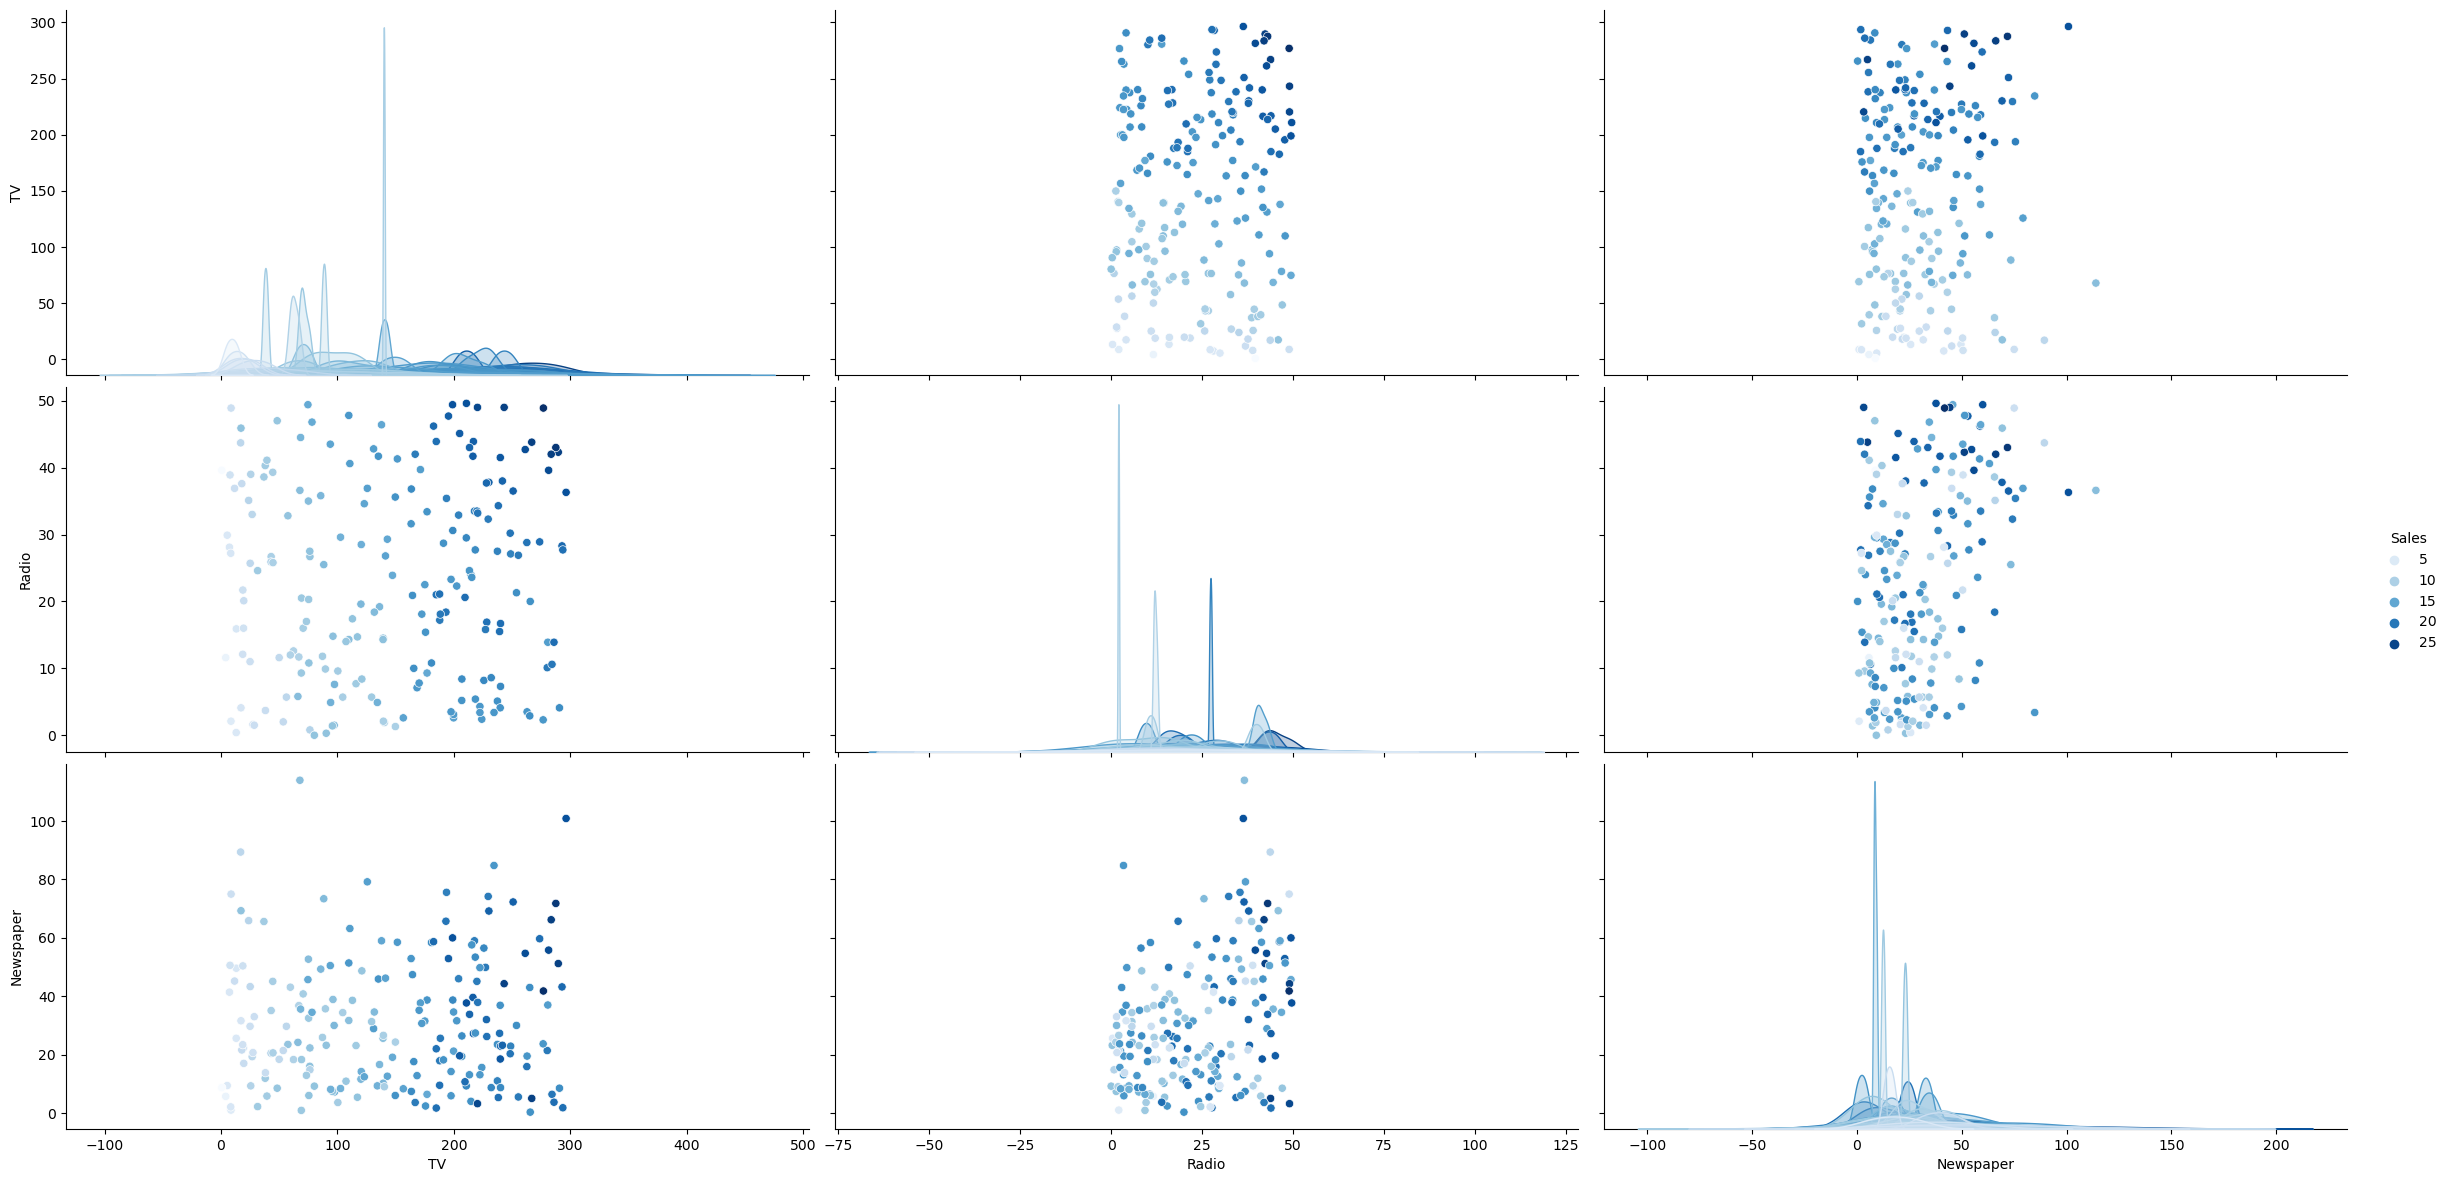

In [8]:
sns.pairplot(df, kind = 'scatter', aspect = 2, height = 4, palette = 'Blues', hue='Sales')

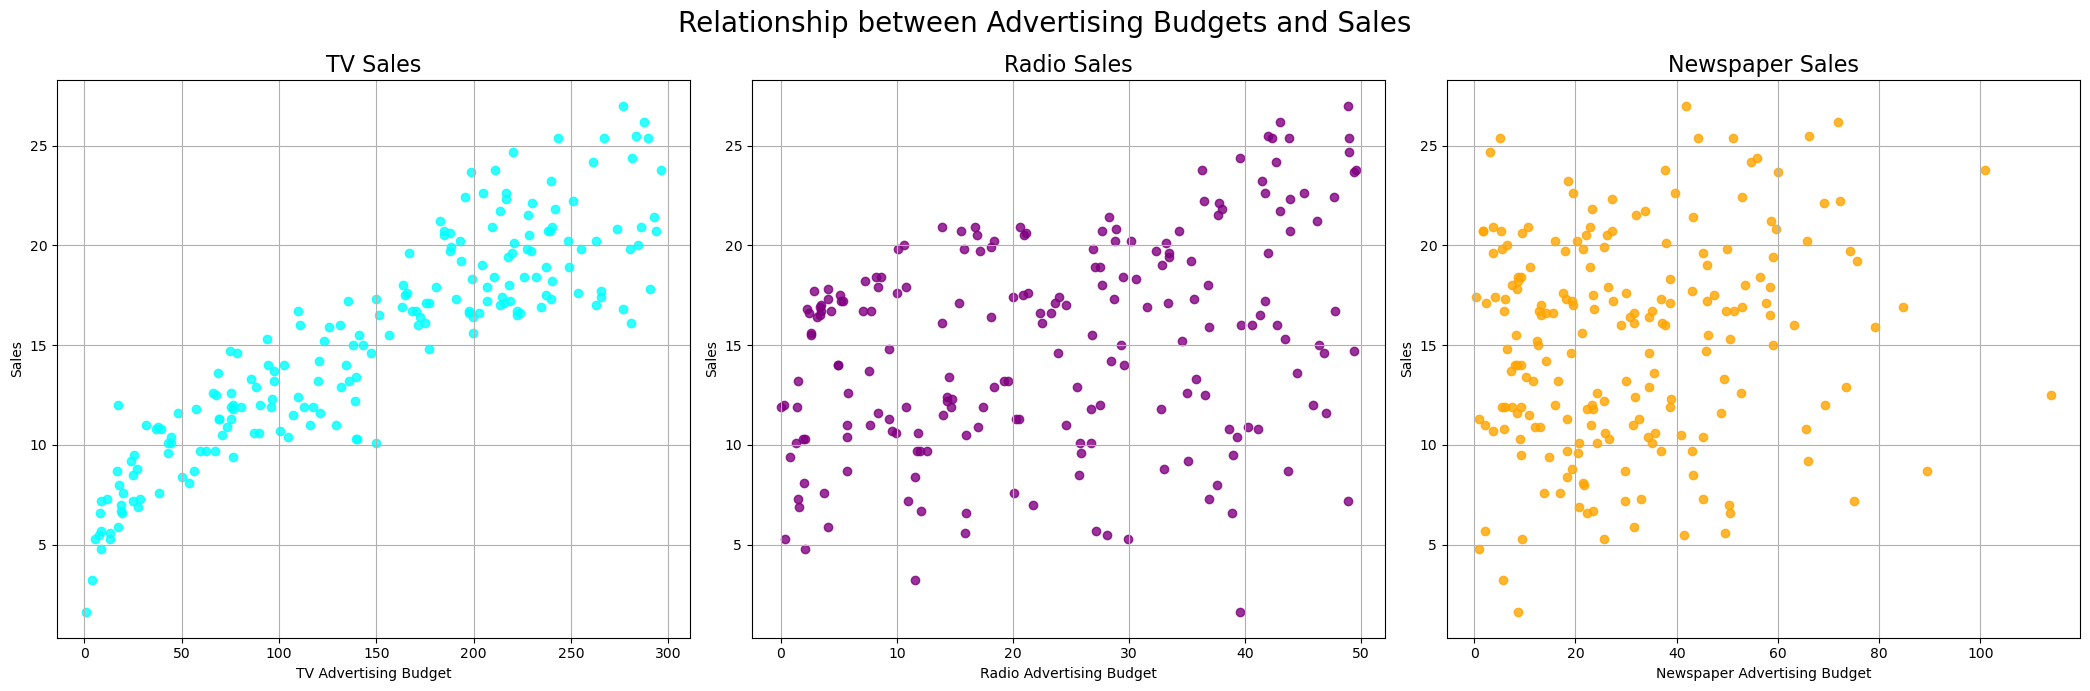

In [9]:
plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
plt.scatter(df['TV'],df['Sales'], alpha=0.8, color='Cyan')
plt.title('TV Sales', fontsize=16)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)

plt.subplot(1,3,2)
plt.scatter(df['Radio'],df['Sales'], alpha=0.8, color='Purple')
plt.title('Radio Sales', fontsize=16)
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)

plt.subplot(1,3,3)
plt.scatter(df['Newspaper'],df['Sales'], alpha=0.8, color='orange')
plt.title('Newspaper Sales', fontsize=16)
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)

plt.suptitle('Relationship between Advertising Budgets and Sales', fontsize=20)

plt.tight_layout()
plt.show();

In [10]:
X = df[["TV", "Radio", "Newspaper"]]
y = df[['Sales']]

In [11]:
print(X.head())
print()
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

   Sales
0   22.1
1   10.4
2   12.0
3   16.5
4   17.9


In [12]:
print((X.shape), (y.shape))

(200, 3) (200, 1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


In [14]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 3)
acc_knn

94.996

In [15]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 3)
acc_decision_tree

100.0

In [23]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 3)
acc_random_forest

99.228

In [17]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)
perceptron = Perceptron()
perceptron.fit(X_train, y_train_transformed)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train_transformed) * 100, 3)
acc_perceptron

3.125

In [18]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train_transformed)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train_transformed) * 100, 3)
acc_sgd

1.875

In [19]:
!pip install xgboost


                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta 

In [20]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
XGBR = XGBRegressor(n_estimators=100, random_state=42)
XGBR.fit(X_train, y_train)
y_pred = XGBR.predict(X_test)
acc_XGBR = round(XGBR.score(X_train, y_train) * 100, 3)
acc_XGBR

100.0

In [24]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=42)
GBR.fit(X_train, y_train)
GBR_model = GBR.predict(X_test)
acc_GBR = round(GBR.score(X_train, y_train) * 100, 3)
acc_GBR

99.321

In [25]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_model = linear.predict(X_test)
acc_linear = round(linear.score(X_train, y_train) * 100, 3)
acc_linear

90.014

In [27]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor', 'XGB Regressor', 'KNN', 'Linear Regression', 
              'Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_knn, acc_linear, acc_random_forest, acc_GBR, acc_perceptron, 
              acc_sgd, acc_XGBR, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Stochastic Gradient Decent,100.000
7,Decision Tree,100.000
3,Linear Regression,99.321
2,KNN,99.228
0,Gradient Boosting Regressor,94.996
1,XGB Regressor,90.014
4,Random Forest,3.125
5,Perceptron,1.875
